# Capstone Project 1: Predict House Price Using Machine Learning

## Introduction:

In this project, I want to develop and evaluate the performance and predictive power of a model trained and tested on data collected from houses in King County, USA. We will use this model to predict the monetary value of a house located in this area. 

This model is useful for real estate agents who can make informative decisions based on the predictive power of this model. 


#### Goal: Which features influence the price of a home and is it possible to predict a price given certain variables?




### Data Wrangling:

Data Science is an iterative process. This means the workflow is non-linear, iterative process. While exploring one aspect of our dataset we may need to go back and change some other aspect of our data.

Data Wrangling, also known as data munging is the process of transforming and mapping our data. This includes both, getting the data stage and exploring the data stage. The exploring step also includes creating data visualization to better understand the data.

Before performing analysis or running algorithms, we need to collect, clean, and transform messy data to create usable data. To set up our environment we first need to import the modules and read the data. The data is a currently in a csv file downloaded from kaggle. I will read the file into my notebook by using the module pandas.(Pandas is the standard tool for data scientist in Python for cleaning and manipulating data) 



### Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('kc_house_data.csv')

### Explore initial dataframe



In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


From observing our dataset using .info() we can see we have 21613 observations(rows) and 21 features(columns). There is no missing values indicated by the 2nd column number showing each feature having the same number of observations. The last column indicates datatype, We may want to change datatypes of some columns, like grade into categorical. If any change is needed it will be done in our exploratory data analysis. 

In [5]:
df.isna().sum() #indicates no nan values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Many of these features can be categorical (condition, grade, view,waterfront) 

In [6]:
df = df.drop('id',axis = 1)

In [7]:
df.waterfront.unique()

array([0, 1])

In [8]:
df.condition.unique()

array([3, 5, 4, 1, 2])

In [9]:
df.grade.unique() #what is the scale? 

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [10]:
df.view.unique() # has been viewed, would be binary. does this indicate the number of times a house has been viewd?

array([0, 3, 4, 2, 1])

In [11]:
df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')

In [12]:
df.grade.value_counts() # after further research the grading system is out of 13.
df.grade = df.grade.astype('category')

In [13]:
df.view.value_counts() # we can analyze if houses cost more if it was viewed more times
df.view = df.view.astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null category
view             21613 non-null category
condition        21613 non-null category
grade            21613 non-null category
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: category(4), float64(5), int64(10), object(1)
memory usage: 2.7+ MB


In [15]:
from datetime import datetime

df['date'] = pd.to_datetime(df['date'])

In [16]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

#### Descriptive Statistics

In [17]:
df.describe() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


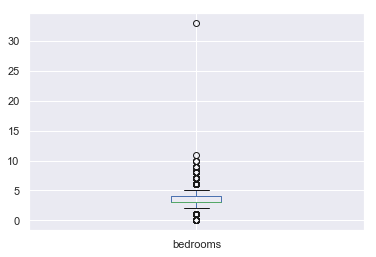

In [18]:
df['bedrooms'].plot(kind='box') #outlier indicating a row that has 33 bedrooms


In [19]:
df = df[df['bedrooms']<33]
df.head()
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


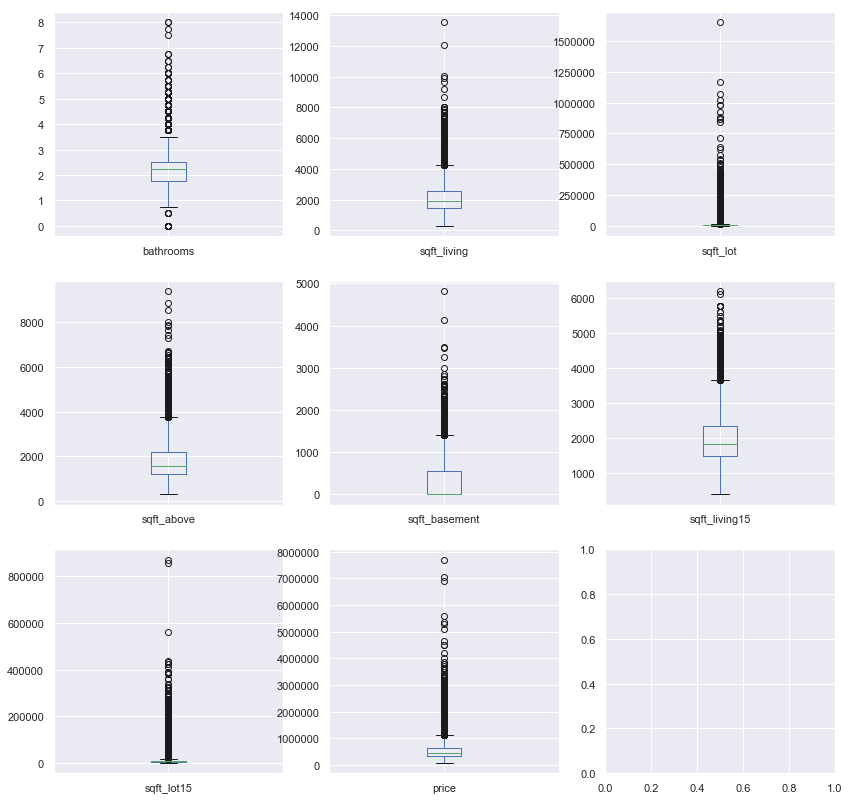

In [20]:
fig, axes = plt.subplots(nrows=3, ncols = 3,figsize = (14,14))


df['bathrooms'].plot(kind='box', ax=axes[0,0])
df['sqft_living'].plot(kind='box', ax=axes[0,1])
df['sqft_lot'].plot(kind='box',ax=axes[0,2])
df['sqft_above'].plot(kind='box', ax=axes[1,0])
df['sqft_basement'].plot(kind='box', ax=axes[1,1])
df['sqft_living15'].plot(kind='box', ax=axes[1,2])
df['sqft_lot15'].plot(kind='box', ax=axes[2,0])
df['price'].plot(kind='box',ax=axes[2,1])

                         

From the boxplots we can see that there are an abundent of data that can be considered outliers, however unlike in the bedrooms columns (which was only 1 value) we should not delete the observation as it may impact our data. We may get more insight in our data visualization section of our project.

## Finding outliers using Z-score

In [21]:


#function for detecting outliers of a dataset
def detect_outlier(data_1):
    '''Takes in a dataset and computes its z_score for each data point and returns
    if a datapoint is an outlier'''
    
    outliers = []
    
    threshold = 3 #if the z-score is greater than 3 than we can classify it as an outlier
    mean_1 = np.mean(data_1)
    std_1 = np.std(data_1)
    
    for y in data_1:
        z_score = (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


In [22]:
#bathroom outliers
outlier_bathrooms = detect_outlier(df['bathrooms'])
print(min(outlier_bathrooms))
df = df[df['bathrooms']< 4.5]

4.5


In [23]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
#sqft_living outliers
outlier_sqft_living = detect_outlier(df['sqft_living'])
print(min(outlier_sqft_living))
df = df[df['sqft_living']< min(outlier_sqft_living)]

4650


In [25]:
#sqft_lot
outlier_sqft_lot = detect_outlier(df['sqft_lot'])
print(min(outlier_sqft_lot))
df = df[df['sqft_lot']<min(outlier_sqft_lot)]

134489


In [26]:
#sqft_above outliers
outlier_sqft_above = detect_outlier(df['sqft_above'])
print(min(outlier_sqft_above))
df = df[df['sqft_above']<min(outlier_sqft_above)]

3960


In [27]:
#sqft_basement outliers
outlier_sqft_base = detect_outlier(df['sqft_basement'])
print(min(outlier_sqft_base))
df = df[df['sqft_basement'] < min(outlier_sqft_base)]

1548


In [28]:
#sqft_living15 outliers
outlier_sqft_li15 = detect_outlier(df['sqft_living15'])
print(min(outlier_sqft_li15))
df = df[df['sqft_living15'] < min(outlier_sqft_li15)]

3800


In [29]:
#sqft_lot15 outliers
outlier_sqft_lot15 = detect_outlier(df['sqft_lot15'])
print(min(outlier_sqft_lot15))
df = df[df['sqft_lot15'] < min(outlier_sqft_lot15)]

56192


In [30]:
#price outliers
outlier_price = detect_outlier(df['price'])
print(min(outlier_price))
df = df[df['price']<1315000.0]

1315000.0


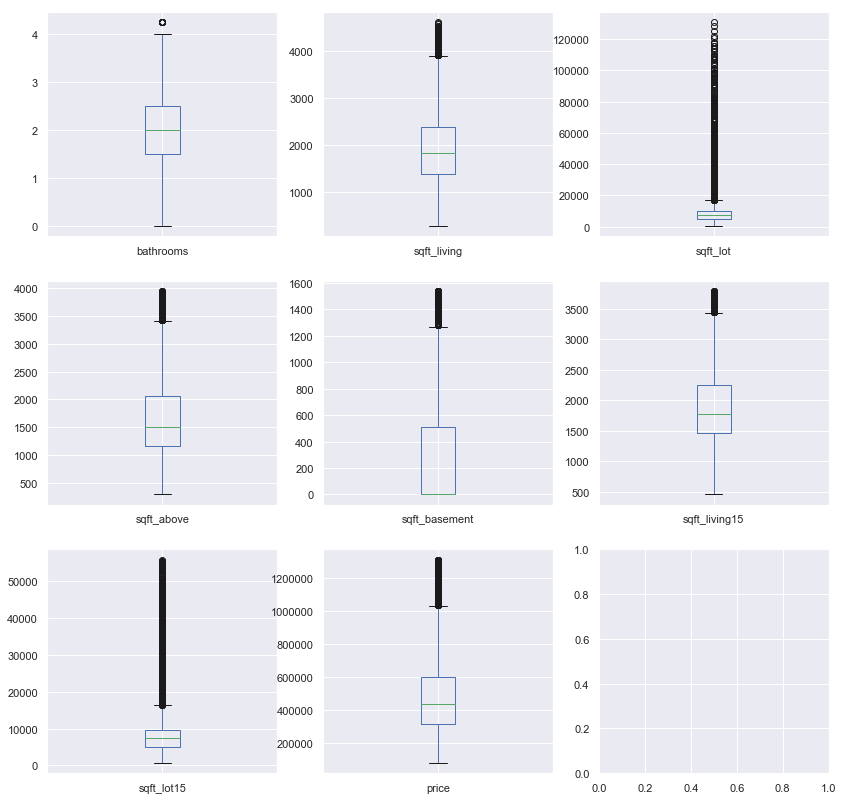

In [31]:
fig, axes = plt.subplots(nrows=3, ncols = 3,figsize = (14,14))


df['bathrooms'].plot(kind='box', ax=axes[0,0])
df['sqft_living'].plot(kind='box', ax=axes[0,1])
df['sqft_lot'].plot(kind='box',ax=axes[0,2])
df['sqft_above'].plot(kind='box', ax=axes[1,0])
df['sqft_basement'].plot(kind='box', ax=axes[1,1])
df['sqft_living15'].plot(kind='box', ax=axes[1,2])
df['sqft_lot15'].plot(kind='box', ax=axes[2,0])
df['price'].plot(kind='box',ax=axes[2,1])


## Data Visualization and Data Storytelling 

### Some further exploration

My initial thoughts on features and price:
- more rooms (bedrooms, bathrooms)
- larger area (sqft_living, sqft_lot, floors)
- if it has a waterfront
- if it was renovated
- higher grade

lets do some exploratory analysis and plot to see if my above assumptions hold value

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


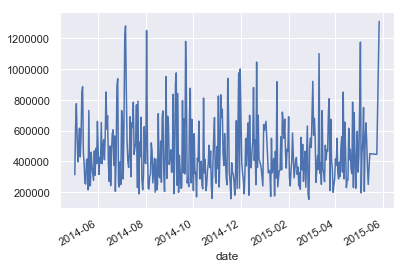

In [33]:
sns.set()
df.groupby(['date'])['price'].first().plot(kind='line') #prices increasing gradually?


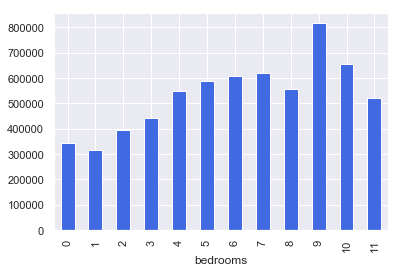

In [34]:
df.groupby('bedrooms')['price'].mean().plot(kind = 'bar',color='royalblue') #bedrooms compared to avg price

#### From the above graph, 9 bedroom homes on average have the highest price.

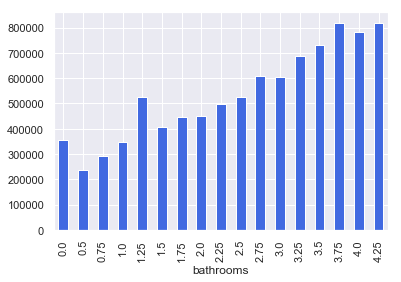

In [35]:
df.groupby('bathrooms')['price'].mean().plot(kind = 'bar',color='royalblue') #initial exploration of bathrooms

#### Average price increase with bathrooms

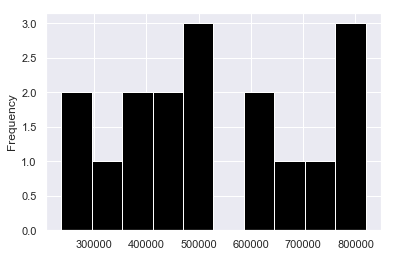

In [36]:
df.groupby('bathrooms')['price'].mean().plot(kind = 'hist',color = 'black')

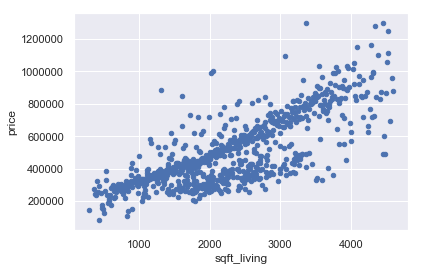

In [37]:
dfaps = df.groupby('sqft_living',as_index=False)['price'].mean()

dfaps.head()
dfaps.plot(kind='scatter',x='sqft_living',y='price') #sqft_living compared to average price

#### From the above chart there seem to be a correlation with sqft_living and average price

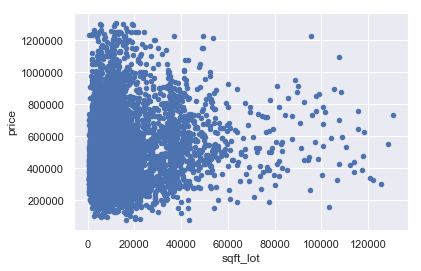

In [38]:
dfapsl = df.groupby('sqft_lot',as_index=False)['price'].mean()

dfaps.head()
dfapsl.plot(kind='scatter',x='sqft_lot',y='price') #sqft_lot compared to average price


no real correlation between sqft_lot and average price

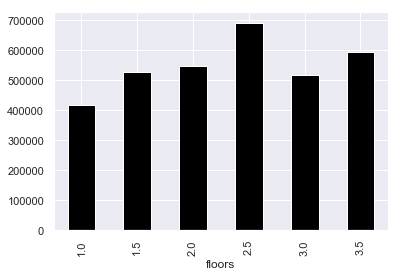

In [39]:
df.groupby('floors')['price'].mean().plot(kind = 'bar',color = 'black')

#### 2.5 floors has the highest average price

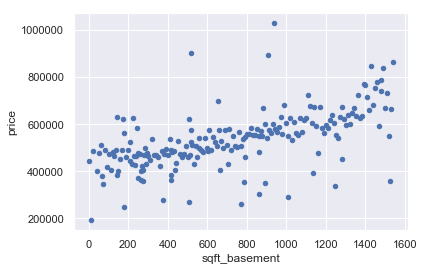

In [40]:
dfapb = df.groupby('sqft_basement',as_index=False)['price'].mean()

dfapb.head()
dfapb.plot(kind='scatter',x='sqft_basement',y='price')

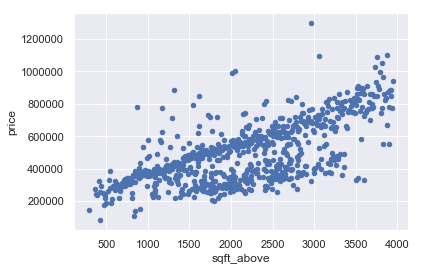

In [41]:
dfapa = df.groupby('sqft_above',as_index=False)['price'].mean()

dfapa.head()
dfapa.plot(kind='scatter',x='sqft_above',y='price')

Both sqft_basement and above have a somewhat positive correlation with average price

In [42]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Renovated Vs Non-Renovated Homes

Lets check if prices are higher for homes that had been renovated compared to none renovated. (and check if homes with waterfront has higher value than homes without) 

From our dataset our waterfront column is already a categorical data type with 0 indicating no waterfront and 1 indicating it has a waterfront. I will be creating a new column renovated which will indicate if a home has been renovated or not. 



In [43]:
df['renovated'] = np.where(df['yr_renovated']==0, 'No', 'Yes')
df.renovated.value_counts()

No     18944
Yes      757
Name: renovated, dtype: int64

In [44]:
df['renovated'] = df.renovated.astype('category') #created category datatype 

#### Houses that were renovated are $231,000 more than houses that were not renovated (on average). Thats about 43% more.

### Waterfront vs Non-Waterfront Homes

In [48]:
dfwater = df[df['waterfront'] == 1]
dfnowater = df[df['waterfront']== 0]

In [49]:
dfwater.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
230,2015-04-13,655000.0,2,1.75,1450,15798,2.0,1,4,3,...,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193,Yes
264,2014-10-27,369900.0,1,0.75,760,10079,1.0,1,4,5,...,760,0,1936,0,98070,47.4683,-122.438,1230,14267,No
1081,2014-08-27,825000.0,2,1.00,1150,12775,1.0,1,4,4,...,1150,0,1908,0,98178,47.5020,-122.222,2440,11852,No
1157,2014-12-29,790000.0,4,1.75,2460,10061,1.0,1,4,3,...,1410,1050,1961,0,98178,47.5105,-122.238,2300,10061,No
1168,2014-10-09,290000.0,2,0.75,440,8313,1.0,1,3,4,...,440,0,1943,0,98070,47.4339,-122.512,880,26289,No


In [50]:
df.waterfront.value_counts()

0    19638
1       63
Name: waterfront, dtype: int64

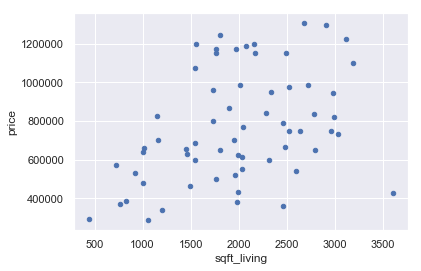

In [51]:
dfwater.plot(kind = 'scatter', x = 'sqft_living', y ='price')

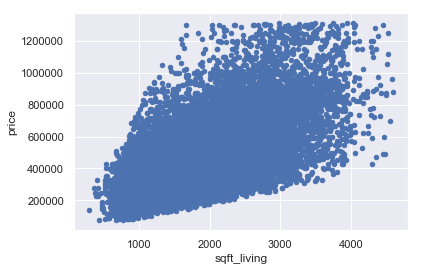

In [52]:
dfnowater.plot(kind = 'scatter', x = 'sqft_living', y ='price')

In [53]:
dfwater.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,7.694118e+05,2.777778,1.936508,1991.158730,19820.222222,1.476190,1621.809524,369.349206,1951.015873,504.650794,98129.333333,47.471362,-122.343952,2085.587302,18665.587302
std,2.848157e+05,1.038679,0.725359,706.657516,17710.124399,0.526925,607.460124,454.890173,24.898822,871.895805,53.931259,0.102654,0.104261,579.507818,11894.911805
min,2.850000e+05,1.000000,0.750000,440.000000,1767.000000,1.000000,440.000000,0.000000,1903.000000,0.000000,98023.000000,47.331100,-122.512000,880.000000,2433.000000
25%,5.595000e+05,2.000000,1.375000,1550.000000,9572.500000,1.000000,1154.500000,0.000000,1932.500000,0.000000,98070.000000,47.387900,-122.409500,1680.000000,10976.000000
50%,7.350000e+05,3.000000,1.750000,1990.000000,15239.000000,1.500000,1550.000000,0.000000,1954.000000,0.000000,98146.000000,47.466300,-122.373000,2060.000000,14267.000000
75%,9.800000e+05,3.000000,2.500000,2505.000000,23270.500000,2.000000,2002.500000,800.000000,1966.500000,980.000000,98178.000000,47.511550,-122.280500,2490.000000,24516.000000
max,1.309500e+06,6.000000,3.500000,3610.000000,107386.000000,3.000000,3130.000000,1430.000000,2007.000000,2004.000000,98198.000000,47.772900,-122.060000,3270.000000,54705.000000


In [54]:
dfnowater.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.963800e+04,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000,19638.000000
mean,4.765244e+05,3.315256,2.027956,1930.637489,9482.418984,1.475583,1671.168704,259.468785,1970.205469,75.308331,98079.832009,47.559988,-122.220404,1891.781088,8677.100978
std,2.177668e+05,0.874263,0.685594,714.306180,10156.849227,0.539452,677.882032,387.563862,29.401341,380.326230,53.639099,0.139587,0.137083,578.617269,7290.175446
min,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.502000,460.000000,651.000000
25%,3.120000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,1160.000000,0.000000,1951.000000,0.000000,98033.000000,47.469300,-122.332000,1460.000000,5000.000000
50%,4.325000e+05,3.000000,2.000000,1830.000000,7339.000000,1.000000,1500.000000,0.000000,1973.000000,0.000000,98072.000000,47.570500,-122.247000,1780.000000,7414.000000
75%,5.990000e+05,4.000000,2.500000,2390.000000,9861.750000,2.000000,2060.000000,510.000000,1996.000000,0.000000,98118.000000,47.680200,-122.136000,2245.000000,9600.000000
max,1.313000e+06,11.000000,4.250000,4600.000000,130680.000000,3.500000,3950.000000,1540.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3790.000000,55931.000000


In [55]:
dfwater['price'].mean()

769411.7777777778

In [56]:
dfnowater['price'].mean()

476524.43894490274

In [57]:
dfwater['price'].mean() - dfnowater['price'].mean()

292887.338832875

In [58]:
(dfwater['price'].mean() - dfnowater['price'].mean())/dfnowater['price'].mean()

0.6146323564880994

#### Homes with waterfronts are around $292,887 more over homes that do not have waterfronts on average. That is around about 61% more. 

### Condition And Grade

In [59]:
df.condition.unique()

[3, 5, 4, 1, 2]
Categories (5, int64): [3, 5, 4, 1, 2]

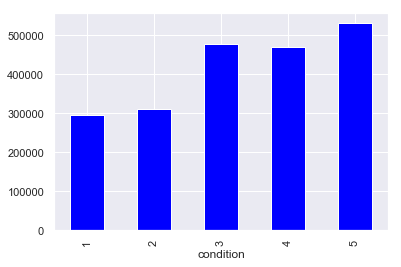

In [60]:
df.groupby('condition')['price'].mean().plot(kind = 'bar',color = 'blue')

#### Conditions of 3,4,5 are best on price (average). Homes of condition 5 holding the most value.

In [61]:
df.groupby('condition')['price'].mean()

condition
1    295105.357143
2    309996.380645
3    476747.055316
4    469169.538388
5    531837.711126
Name: price, dtype: float64

In [62]:
df.price.mean() #average price of a house in our dataset

477461.0361910563

In [63]:
percent_diff = []
for avg_price in df.groupby('condition')['price'].mean():
    percent_diff.append(avg_price/df.price.mean())

In [64]:
percent_diff

[0.6180721247896144,
 0.6492600592462083,
 0.9985046300721375,
 0.9826341896521669,
 1.1138871464115747]

#### From my calculations homes with condition 1 and 2 are around 38, 35% less on average, respectively, than the average price of a house in our dataset, a home with condition 3 is around the same, a condition of 4 is about 2% less than the average and a house with condition 5 is about 11% higher than the average price.
- condition 1: -38% 
- condition 2: -35%
- condition 3: 0%
- condition 4: -2%
- condition 5: 11%

From this analysis, homes with condition 5 are slightly more (based on average price). 

In [65]:
df.grade.unique()

[7, 6, 8, 9, 5, 10, 4, 11, 3, 1]
Categories (10, int64): [7, 6, 8, 9, ..., 4, 11, 3, 1]

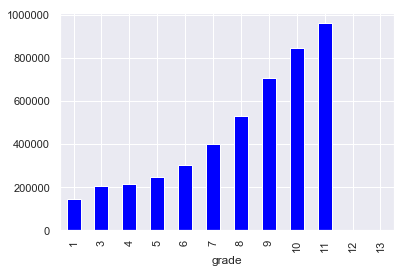

In [66]:
df.groupby('grade')['price'].mean().plot(kind = 'bar',color = 'blue')

This graph what I expected the relationship of the cost and price to be. Better grade will be a higher price. I would like to point out there is no grade of 2.

In [67]:
df.groupby('grade')['price'].mean()

grade
1     142000.000000
3     205666.666667
4     212573.214286
5     245463.671053
6     301054.880725
7     400349.363501
8     531058.727414
9     706646.536351
10    844170.753446
11    961504.445946
12              NaN
13              NaN
Name: price, dtype: float64

In [68]:
df.price.mean()

477461.0361910563

In [69]:
percent_diff_grade = []
for avg_price in df.groupby('grade')['price'].mean():
    percent_diff_grade.append(avg_price/df.price.mean())

In [70]:
percent_diff_grade

[0.2974064672016056,
 0.4307506813694616,
 0.4452158357915786,
 0.5141019946063392,
 0.6305328768319503,
 0.83849640736153,
 1.1122556337802563,
 1.4800088023693747,
 1.7680411373041132,
 2.013786200474795,
 nan,
 nan]

## Visualizing each feature

### Price

In [71]:
df['price'].describe()

count    1.970100e+04
mean     4.774610e+05
std      2.186310e+05
min      7.500000e+04
25%      3.125000e+05
50%      4.335000e+05
75%      5.999500e+05
max      1.313000e+06
Name: price, dtype: float64

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Price Distribution')

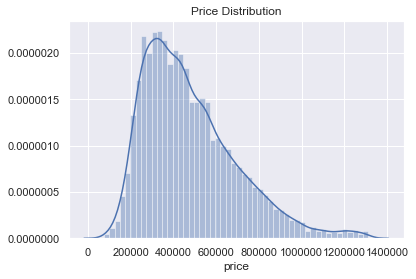

In [72]:
sns.distplot(df['price'])
plt.title('Price Distribution')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2232db38>,
 'caps': [<matplotlib.lines.Line2D at 0x1a22335438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2232d5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a22335cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a22335e10>],
 'means': []}

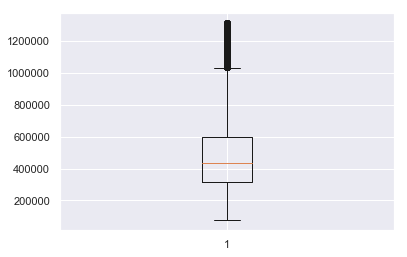

In [73]:
plt.boxplot(df['price'])

In [74]:
#function to create an ecdf for a dataset 
def ecdf(data):
    '''Takes in a data set and creates a ecdf for that set '''
    n= len(data)
    x= np.sort(data)
    y= np.arange(1,n+1)/n
    return x,y
    

(array([ 736., 4610., 5014., 3788., 2394., 1564.,  853.,  373.,  176.,
         193.]),
 array([  75000.,  198800.,  322600.,  446400.,  570200.,  694000.,
         817800.,  941600., 1065400., 1189200., 1313000.]),
 <a list of 10 Patch objects>)

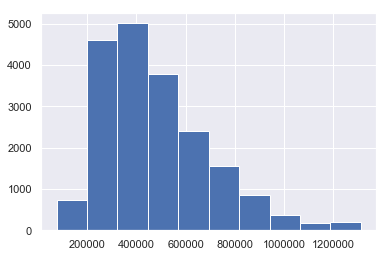

In [75]:
plt.hist(df['price'])

In [76]:
mean_price = np.mean(df['price'])
std_price = np.std(df['price'])
samples = np.random.normal(mean_price,std_price, size =10000)
x_theor,y_thoer = ecdf(samples)
x,y = ecdf(df['price'])

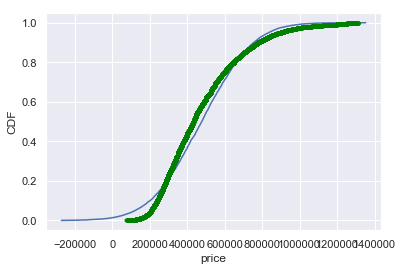

In [77]:
plt.plot(x_theor,y_thoer)
plt.plot(x,y,marker='.',linestyle='none',color='green')
plt.xlabel('price')
plt.ylabel('CDF')
plt.show()

In [78]:
#calculated statistics
prices = df['price']
print('Statistics for housing dataset (Price):\n')
print('Minimum Price: ${}'.format(np.min(prices)))
print('Maximum Price: ${}'.format(np.max(prices)))
print('Mean Price: ${}'.format(np.mean(prices)))
print('Median Price: ${}'.format(np.median(prices)))
print('Standard Deviation of Prices: ${}'.format(np.std(prices)))

Statistics for housing dataset (Price):

Minimum Price: $75000.0
Maximum Price: $1313000.0
Mean Price: $477461.0361910563
Median Price: $433500.0
Standard Deviation of Prices: $218625.41951129772


In [79]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


In [80]:
dfn = df[['price', 'bedrooms', 'sqft_living','condition']].copy()

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


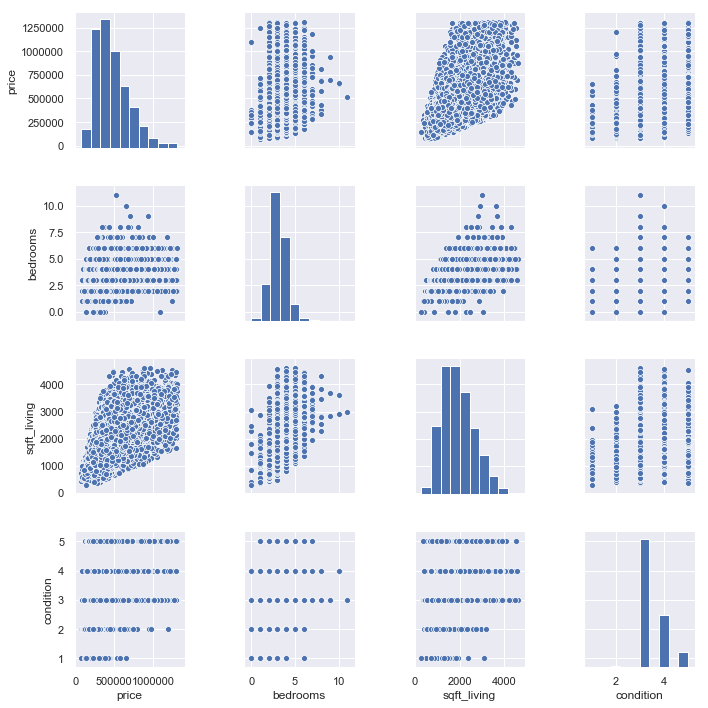

In [81]:
sns.pairplot(dfn, size=2.5)
plt.tight_layout()

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

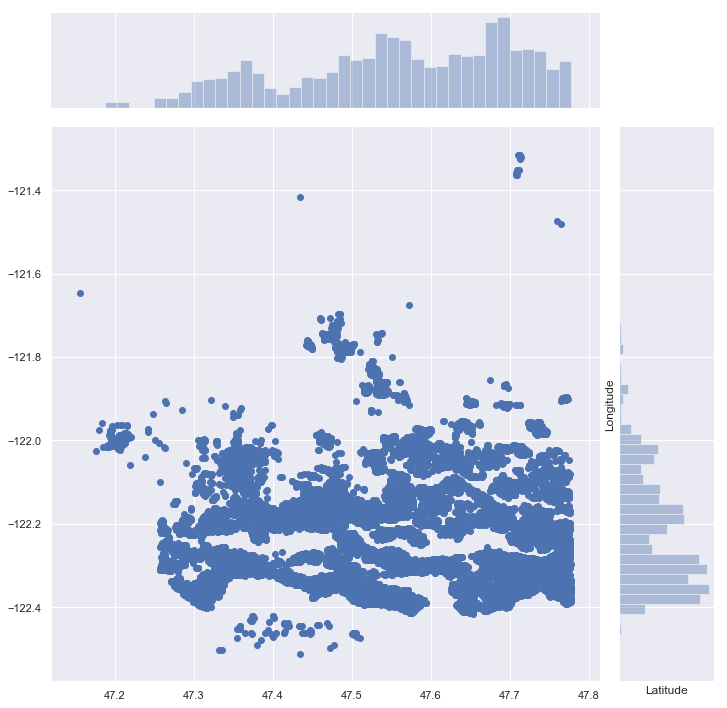

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [82]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude',fontsize=12)
plt.show()
sns.despine

### Date 

In [83]:
import datetime as dt

In [84]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


In [85]:
dfdate = df[['date', 'price']].copy()


In [86]:
dfdate['month'] = df['date'].dt.month

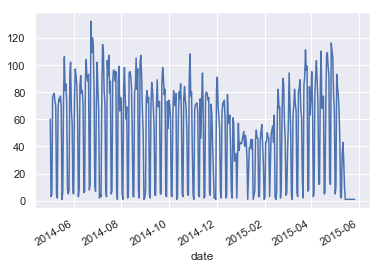

In [87]:
dfdate.groupby('date')['price'].count().plot()

#### There seems to be a slight dip from the amount of houses sold between 2014-12 and 2015-03(indicating the end of the year and beginning of a new year. Are house price cheaper between these dates than the other times? 

In [88]:
dfdateless = dfdate[(dfdate['date'] >= '2014-12') & (dfdate['date'] < '2015-03')]

In [89]:
dfdateless.head()

,date,price,month
1,2014-12-09,538000.0,12
2,2015-02-25,180000.0,2
3,2014-12-09,604000.0,12
4,2015-02-18,510000.0,2
7,2015-01-15,291850.0,1


In [90]:
dfdateless.head().describe()

,price,month
count,5.000000,5.000000
mean,424770.000000,5.800000
std,180130.964856,5.674504
min,180000.000000,1.000000
25%,291850.000000,2.000000
50%,510000.000000,2.000000
75%,538000.000000,12.000000
max,604000.000000,12.000000


In [91]:
dfdate[(dfdate['date'] >= '2015-03') | (dfdate['date'] < '2014-12')].describe()


,price,month
count,1.632200e+04,16322.000000
mean,4.815885e+05,6.756035
std,2.198228e+05,2.474804
min,7.800000e+04,3.000000
25%,3.150000e+05,5.000000
50%,4.379250e+05,7.000000
75%,6.020000e+05,9.000000
max,1.311000e+06,11.000000


In [92]:
424770/544827 #houses are on average 22% less during the end of the year and beginning of a new year 

0.7796419780957993

In [93]:
dfdateless.head()

,date,price,month
1,2014-12-09,538000.0,12
2,2015-02-25,180000.0,2
3,2014-12-09,604000.0,12
4,2015-02-18,510000.0,2
7,2015-01-15,291850.0,1


In [94]:
dfdate[(dfdate['date'] >= '2014-12') & (dfdate['date'] < '2015-03')].count()

date     3379
price    3379
month    3379
dtype: int64

In [95]:
dfdate.count()

date     19701
price    19701
month    19701
dtype: int64

In [96]:
3638/21436 #about 17 percent of total homes sold

0.16971449897368912

#### Toward the beginning of 2015 and end of 2014 less homes were being sold, however they were being sold at around 22% less on average compared to houses outside these dates. About 17% of homes were sold during this time.

In [97]:
dfdate100 = dfdate[dfdate.groupby('date')['price'].transform('size') >= 100]
# all dates where somes sold exceeded 100
dfdate100.head()

,date,price,month
12,2014-05-28,310000.0,5
26,2014-06-26,937000.0,6
28,2014-06-24,438000.0,6
32,2014-06-24,687500.0,6
36,2014-05-28,550000.0,5


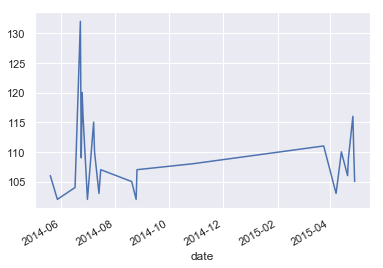

In [98]:
dfdate100.groupby('date')['price'].count().plot()

#### Most houses are sold during the summer. As you can see from the graph a spike in house sold between 2014-06 and 2014-08. While less homes are sold during the end of the year and beginning of the new year.

In [99]:
#descriptive statistics of homes sold in the summer of 2014
dfdate[(dfdate['date'] >= '2014-06') & (dfdate['date'] < '2014-08')].describe()


,price,month
count,3.990000e+03,3990.000000
mean,4.884411e+05,6.503008
std,2.239961e+05,0.500054
min,8.650000e+04,6.000000
25%,3.190000e+05,6.000000
50%,4.450000e+05,7.000000
75%,6.150000e+05,7.000000
max,1.309500e+06,7.000000


In [100]:
#descriptive stats of homes other than the summer of 2014
dfdate[(dfdate['date'] >= '2014-08') | (dfdate['date'] < '2014-06')].describe()


,price,month
count,1.571100e+04,15711.000000
mean,4.746725e+05,6.592515
std,2.171662e+05,3.483007
min,7.500000e+04,1.000000
25%,3.109750e+05,4.000000
50%,4.300000e+05,5.000000
75%,5.950000e+05,10.000000
max,1.313000e+06,12.000000


In [101]:
551348/537742

1.0253020965444395

In [102]:
dfdate[(dfdate['date'] >= '2014-06') & (dfdate['date'] < '2014-08')].count()

date     3990
price    3990
month    3990
dtype: int64

In [103]:
dfdate.count()

date     19701
price    19701
month    19701
dtype: int64

In [104]:
4391/21436 #20 percent of homes were sold during the summer

0.20484232132860608

#### Most homes are sold in the summer at a 2.5% increase on average price compared to homes outside this summer. About 20.5% of homes are sold during the summer.

In [105]:
dfdate.describe()

,price,month
count,1.970100e+04,19701.000000
mean,4.774610e+05,6.574387
std,2.186310e+05,3.118686
min,7.500000e+04,1.000000
25%,3.125000e+05,4.000000
50%,4.335000e+05,6.000000
75%,5.999500e+05,9.000000
max,1.313000e+06,12.000000


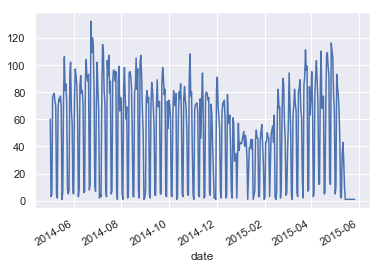

In [106]:
dfdate.groupby('date')['price'].count().plot() #lets take a look at graph again

lets analyze dates between 2014-08 and 2014-12


In [107]:
#dates from summer to end of year (Q3 & Q4)
dfdate[(dfdate['date'] >= '2014-08') & (dfdate['date'] < '2014-12')].describe()


,price,month
count,6.407000e+03,6407.000000
mean,4.705861e+05,9.393788
std,2.143219e+05,1.093610
min,8.200000e+04,8.000000
25%,3.100000e+05,8.000000
50%,4.250000e+05,9.000000
75%,5.850000e+05,10.000000
max,1.311000e+06,11.000000


In [108]:
dfdate[(dfdate['date'] < '2014-08') | (dfdate['date'] > '2014-12')].describe()


,price,month
count,1.321200e+04,13212.000000
mean,4.808879e+05,5.173479
std,2.207189e+05,2.814804
min,7.500000e+04,1.000000
25%,3.150000e+05,3.000000
50%,4.370000e+05,5.000000
75%,6.030000e+05,6.000000
max,1.313000e+06,12.000000


In [109]:
532571/544208

0.9786166318760474

In [110]:
dfdate[(dfdate['date'] >= '2014-08') & (dfdate['date'] < '2014-12')].count()

date     6407
price    6407
month    6407
dtype: int64

In [111]:
dfdate.count()

date     19701
price    19701
month    19701
dtype: int64

In [112]:
6985/21436

0.32585370404926295

#### Home sold between the summer and the end of the year (Q3 & Q4) are sold 3% less on average compared to homes outside this date. About 32.5% of the homes are sold during this time

#### Dates between 2014-06 and 2014-08, around the summer
- have a 2.5% more on average compared to other dates
- 20.5% of homes sold

#### Dates between 2014-12 and 2015-03
- 22% less on average compared to other dates
- 17% of homes sold

#### Dates between 2014-08 and 2014-12, (Q3 & Q4)
- 3% less on average compared to other dates
- 32% of homes sold


lets analyze the data by month

In [113]:
dfdate.head()

,date,price,month
0,2014-10-13,221900.0,10
1,2014-12-09,538000.0,12
2,2015-02-25,180000.0,2
3,2014-12-09,604000.0,12
4,2015-02-18,510000.0,2


Lets group each month to their corresponding season
- Spring runs from March 1 to May 31
- Summer runs from June 1 to August 31
- Fall runs from September 1 to November 30 
- Winter runs from December 1 to February 28

In [114]:
dfdate['season'] = 'Winter'
dfdate.loc[(dfdate['month']>=3) & (dfdate['month'] <=5),'season'] = 'Spring'
dfdate.loc[(dfdate['month']>=6) & (dfdate['month'] <=8),'season'] = 'Summer'
dfdate.loc[(dfdate['month']>=9) & (dfdate['month'] <=11),'season'] = 'Fall'

In [115]:
dfdate.head()

,date,price,month,season
0,2014-10-13,221900.0,10,Fall
1,2014-12-09,538000.0,12,Winter
2,2015-02-25,180000.0,2,Winter
3,2014-12-09,604000.0,12,Winter
4,2015-02-18,510000.0,2,Winter


In [116]:

dfdate.min() #2014-05-02
dfdate.max() #2015-05-27, extra month of data. 
#We should exclude this extra month to get a better representation of year of housing data

dfdate_lessmonth = dfdate[dfdate['date']> '2014-05-27']

Text(0.5,1,'Number of houses sold per season')

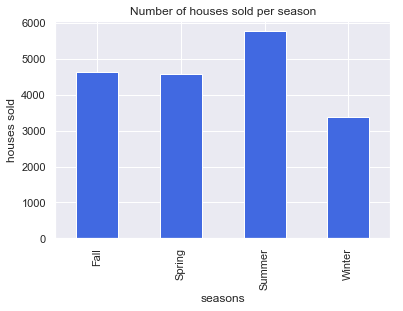

In [117]:
dfdate_lessmonth.groupby('season')['price'].count().plot(kind='bar',color = 'royalblue')
plt.xlabel('seasons')
plt.ylabel('houses sold')
plt.title('Number of houses sold per season')

#### From the graph majority of the homes are sold between Spring and Summer

In [118]:
dfdate_lessmonth.groupby('season')['price'].count()

season
Fall      4636
Spring    4567
Summer    5761
Winter    3379
Name: price, dtype: int64

In [119]:
5048+4911+6328+3638


19925

In [120]:
fallpc= 5048/19925
springpc = 4911/19925
summerpc=6328/19925
winterpc = 3638/19925

print(fallpc)
print(springpc)
print(summerpc)
print(winterpc)

0.25335006273525723
0.24647427854454204
0.3175909661229611
0.18258469259723964


##### Percentage of Homes sold by Season
- around 25% of homes were sold in the Fall
- around 25% of homes were sold in the Spring
- around 32% of homes were sold in the Summer
- around 18% of homes were sold in the Winter


Text(0.5,1,'Number Of Houses Sold per Season')

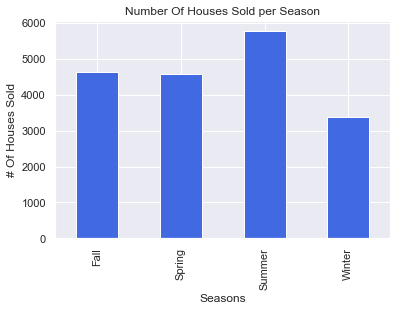

In [121]:
dfdate_lessmonth.groupby('season')['price'].count().plot(kind='bar',color = 'royalblue')
plt.xlabel('Seasons')
plt.ylabel('# Of Houses Sold')
plt.title('Number Of Houses Sold per Season')

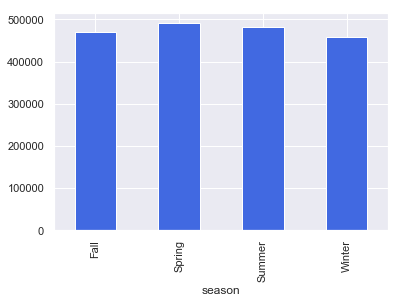

In [122]:
dfdate_lessmonth.groupby('season')['price'].mean().plot(kind='bar',color = 'royalblue')

In [123]:
dfdate_lessmonth.groupby('season')['price'].mean()

season
Fall      470187.688093
Spring    490863.974381
Summer    483272.871376
Winter    457523.510802
Name: price, dtype: float64

In [124]:
dfdate_lessmonth.describe()

,price,month
count,1.834300e+04,18343.000000
mean,4.771124e+05,6.690945
std,2.186370e+05,3.201438
min,7.500000e+04,1.000000
25%,3.120000e+05,4.000000
50%,4.325000e+05,7.000000
75%,5.999500e+05,9.000000
max,1.313000e+06,12.000000


In [125]:
fallpcp= 531286/540376
springpcp = 557020/540376
summerpcp=546626/540376
winterpcp = 519647/540376

print(fallpcp)
print(springpcp)
print(summerpcp)
print(winterpcp)

0.9831783794987194
1.0308007757561402
1.0115660206967
0.9616396731164967


#### Average price per season compared to average price overall
- homes in the Fall were sold ~2% less than average
- homes in the Spring were sold ~3% more than average
- homes in the Summer were sold ~1% more than average
- homes in the Winter were sold ~4% less than average

In [126]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


### Bedrooms

For this feature, my initial assumptions are homes with more bedrooms would have a higher price. 

In [127]:
df.bedrooms.value_counts()

3     9314
4     6053
2     2669
5     1238
1      191
6      189
7       24
0       11
8        7
10       2
9        2
11       1
Name: bedrooms, dtype: int64

In [128]:
dfbed = df[['bedrooms', 'price']].copy()
dfbed.head()

,bedrooms,price
0,3,221900.0
1,3,538000.0
2,2,180000.0
3,4,604000.0
4,3,510000.0


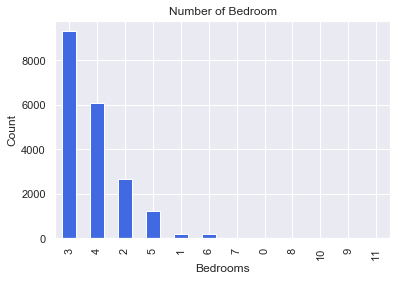

In [129]:
df['bedrooms'].value_counts().plot(kind='bar',color ='royalblue')
plt.title('Number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

Text(0,0.5,'Average Price')

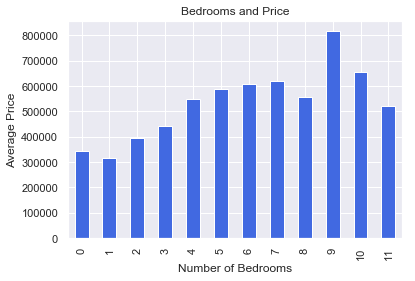

In [130]:
dfbed.groupby('bedrooms')['price'].mean().plot(kind = 'bar',color = 'royalblue')
plt.title('Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')

#### Bedroom's mean prices gradually increase from 1 with the highest mean price on 8 bedrooms. 

### Bathrooms 

Like with bedrooms, I would assume homes with more bathrooms would have a higher price.

In [131]:
df['bathrooms'].value_counts()

2.50    5028
1.00    3784
1.75    2933
2.25    1919
2.00    1849
1.50    1414
2.75    1052
3.00     636
3.50     486
3.25     367
3.75      73
0.75      67
4.00      53
4.25      19
0.00       9
1.25       8
0.50       4
Name: bathrooms, dtype: int64

In [132]:
dfbath = df[['bathrooms', 'price']].copy()


Text(0,0.5,'Average Price')

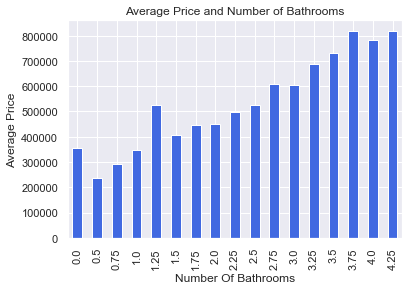

In [133]:
dfbath.groupby('bathrooms')['price'].mean().plot(kind='bar',color = 'royalblue')
plt.title('Average Price and Number of Bathrooms')
plt.xlabel('Number Of Bathrooms')
plt.ylabel('Average Price')

#### Prices are gradually higher on homes with more bathromms. With some exceptions like a home with 7.5 bathrooms. 

In [134]:
df[df['bathrooms'] == 7.5] #only has one home with 7.5, maybe its better to group bathrooms as whole

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated


In [135]:
def brn(x):
    if x['bathrooms'] <=1 : return 1
    elif x['bathrooms'] <=2 : return 2
    elif x['bathrooms'] <=3 : return 3
    elif x['bathrooms'] <=4 : return 4
    elif x['bathrooms'] <=5 : return 5
    elif x['bathrooms'] <=6 : return 6
    elif x['bathrooms'] <=7 : return 7
    else: return 8
    
    
dfbath['numbathroom'] = dfbath.apply(brn, axis=1)

In [136]:
dfbath.head()

,bathrooms,price,numbathroom
0,1.00,221900.0,1
1,2.25,538000.0,3
2,1.00,180000.0,1
3,3.00,604000.0,3
4,2.00,510000.0,2


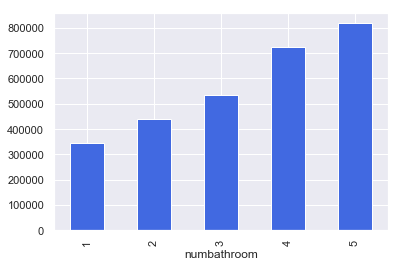

In [137]:
dfbath.groupby('numbathroom')['price'].mean().plot(kind='bar',color = 'royalblue')

In [138]:
dfbath.groupby('numbathroom')['price'].mean()

numbathroom
1    346321.575052
2    438465.257898
3    535341.188419
4    725019.495403
5    819452.631579
Name: price, dtype: float64

In [139]:
sbath = dfbath.groupby('numbathroom')['price'].mean()

In [140]:
abdict = {}
for i, v in sbath.items():
    avgppb = v/i
    abdict[i] = avgppb

Text(0,0.5,'Average Price')

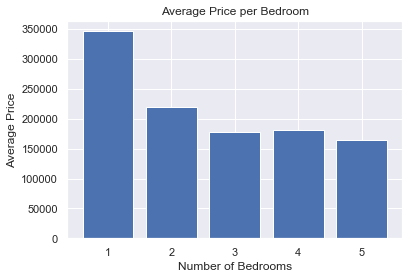

In [141]:
lists = sorted(abdict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x,y)
plt.title('Average Price per Bedroom')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')


#### Average price per bathroom is lowest at 3, increasing with each bedroom after 3. While average price per bathroom is highest at 1 and rooms greater than 6.

In [142]:
 df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


### Sqft_Living

In [143]:
dfsqft = df[['sqft_living', 'price']].copy()


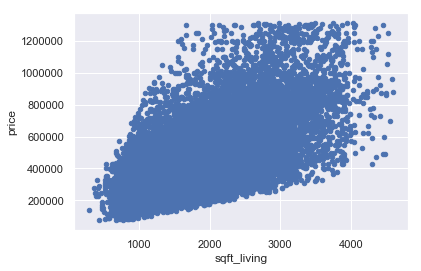

In [144]:
dfsqft.plot(kind='scatter',x='sqft_living',y='price')

#### The scatter plot does show a positive correlation between price and sqft_living. 

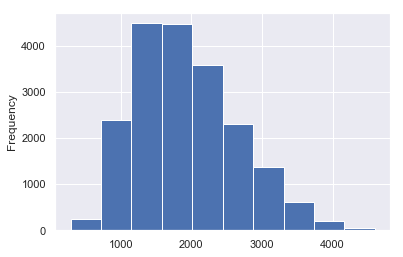

In [145]:
dfsqft['sqft_living'].plot(kind='hist')

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Square Feet')

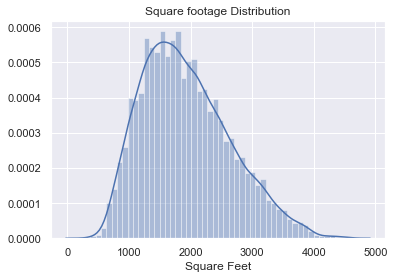

In [146]:
sns.distplot(df['sqft_living'])
plt.title('Square footage Distribution')
plt.xlabel('Square Feet')

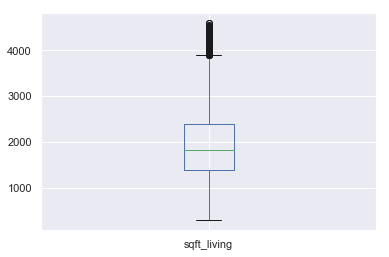

In [147]:
dfsqft['sqft_living'].plot(kind='box')

In [148]:
dfsqftless7 = dfsqft[dfsqft['sqft_living']<7000]

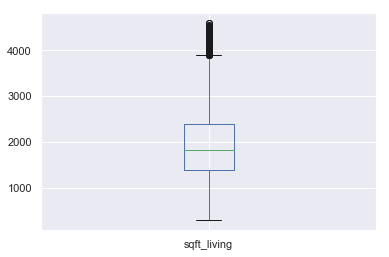

In [149]:
dfsqftless7['sqft_living'].plot(kind='box')

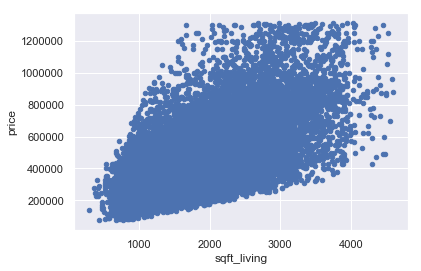

In [150]:
dfsqftless7.plot(kind='scatter',x='sqft_living',y='price')

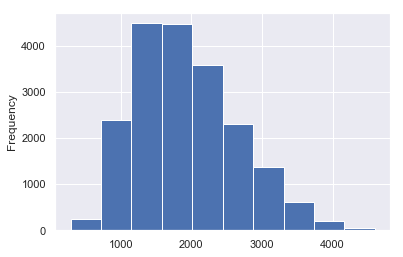

In [151]:
dfsqftless7['sqft_living'].plot(kind='hist')

In [152]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


### Sqft_lot

In [153]:
dfsqftlot = df[['sqft_lot', 'price']].copy()


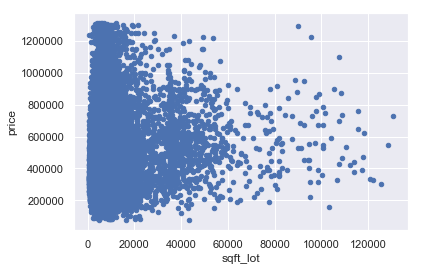

In [154]:
dfsqftlot.plot(kind='scatter',x='sqft_lot',y='price')

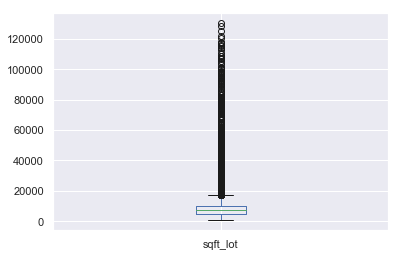

In [155]:
dfsqftlot['sqft_lot'].plot(kind='box')

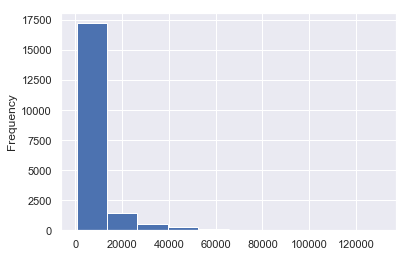

In [156]:
dfsqftlot['sqft_lot'].plot(kind='hist')

The sqft lot with price doesn't show a pattern or any correlation. The box plots shows an abundance of outliers and the histrogram distribution is skewed to the right.

In [157]:
dfsqftlot['sqft_lot'].describe()

count     19701.000000
mean       9515.477285
std       10205.854712
min         520.000000
25%        5000.000000
50%        7350.000000
75%        9886.000000
max      130680.000000
Name: sqft_lot, dtype: float64

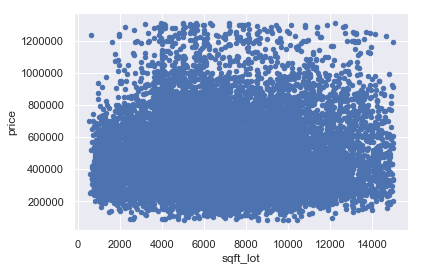

In [158]:
dfsqftlot[dfsqftlot['sqft_lot']<15000].plot(kind='scatter',x='sqft_lot',y='price')

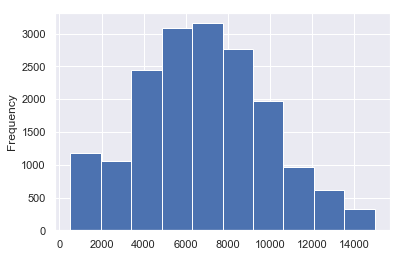

In [159]:
dfsqftlot[dfsqftlot['sqft_lot']<15000]['sqft_lot'].plot(kind='hist')

Even filtering the sqft_lot data to below sqft_mean there is not much of a correlation between the two features(sqft_lot and price)

In [160]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


### Floors

In [161]:
dffloors = df[['floors', 'price']].copy()


In [162]:
dffloors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19701 entries, 0 to 21612
Data columns (total 2 columns):
floors    19701 non-null float64
price     19701 non-null float64
dtypes: float64(2)
memory usage: 461.7 KB


In [163]:
dffloors.floors.value_counts()

1.0    10086
2.0     7147
1.5     1775
3.0      577
2.5      109
3.5        7
Name: floors, dtype: int64

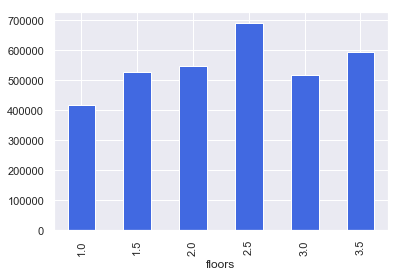

In [164]:
dffloors.groupby('floors')['price'].mean().plot(kind='bar',color = 'royalblue')

#### The floors are split into 1.0, 1.5, 2.0, 2.5, 3.0,and 3.5 floor categories. With floors 2.5 having the highest mean price out of all other floors. 

In [165]:
dffloors.groupby('floors')['price'].mean()

floors
1.0    415459.871505
1.5    527848.868732
2.0    545874.496992
2.5    690989.596330
3.0    517071.875217
3.5    595214.285714
Name: price, dtype: float64

In [166]:
#what is the mean price per half floor?
def amounthalfs(i):
    halfs = i/.5
    return halfs

flrs = dffloors.groupby('floors')['price'].mean()

fphd = { }
for i,v in flrs.items():
    deno = amounthalfs(i)
    num = v
    fphd[i] = num/deno
    

fphd   
   



{1.0: 207729.93575252825,
 1.5: 175949.62291079815,
 2.0: 136468.62424793618,
 2.5: 138197.91926605505,
 3.0: 86178.64586943963,
 3.5: 85030.61224489796}

Text(0,0.5,'Average Price')

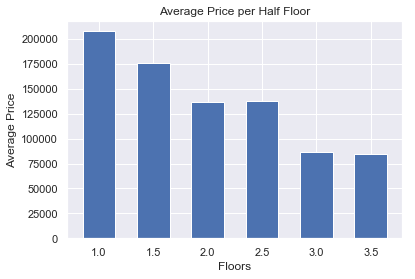

In [167]:
lists = sorted(fphd.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x,y,width = .3, align='center')
plt.title('Average Price per Half Floor')
plt.xlabel('Floors')
plt.ylabel('Average Price')


#### Houses with 3 floors have a lower mean price per half floor than any other floors. 

### Basement

In [168]:
df[df['sqft_basement']==0]['sqft_basement'].count( )#13015 homes have 0 values for sqft_basement,not recorded?


12161

In [169]:
dfbasement = df[['sqft_basement', 'price']].copy()


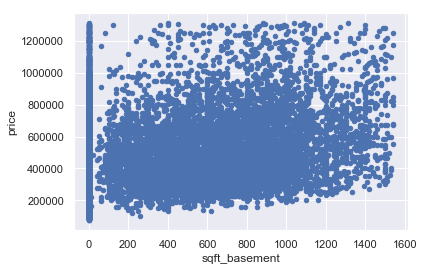

In [170]:
dfbasement.plot(kind='scatter',x='sqft_basement',y='price')

lets get rid of the zeros

In [171]:
dfbasement = dfbasement[dfbasement['sqft_basement'] != 0]

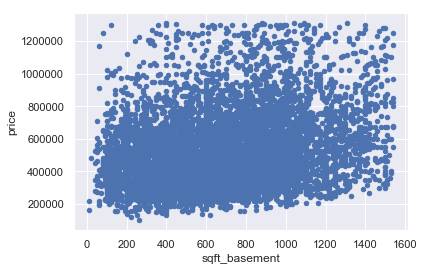

In [172]:
dfbasement.plot(kind='scatter',x='sqft_basement',y='price')

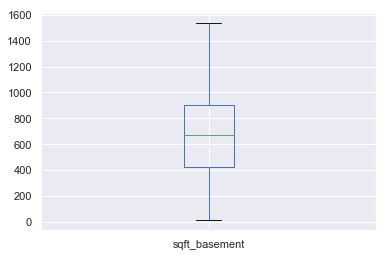

In [173]:
dfbasement['sqft_basement'].plot(kind='box')

In [174]:
dfbasement['sqft_basement'].describe()

count    7540.000000
mean      678.874934
std       329.428321
min        10.000000
25%       420.000000
50%       670.000000
75%       900.000000
max      1540.000000
Name: sqft_basement, dtype: float64

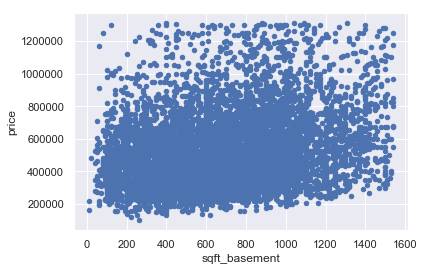

In [175]:
dfbasement[dfbasement['sqft_basement'] <= 1700].plot(kind='scatter',x='sqft_basement',y='price')

#### Price and sqft_basement has no correlation.

In [176]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


### Year Built and Renovations

I would assume older houses would be cost less than new houses.

In [177]:
dfbuilt = df[['yr_built','yr_renovated','renovated', 'price']].copy()


In [178]:
dfbuilt.head()

,yr_built,yr_renovated,renovated,price
0,1955,0,No,221900.0
1,1951,1991,Yes,538000.0
2,1933,0,No,180000.0
3,1965,0,No,604000.0
4,1987,0,No,510000.0


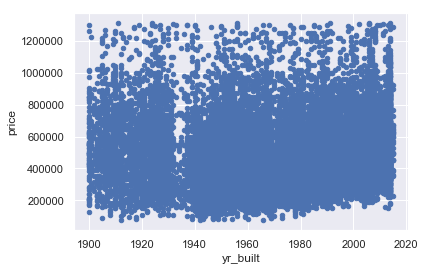

In [179]:
dfbuilt.plot(kind='scatter',x='yr_built',y='price')

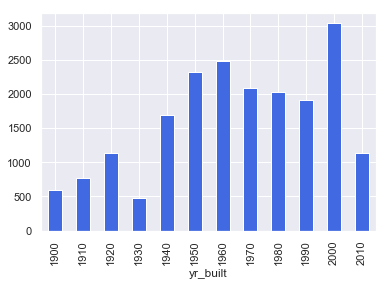

In [180]:
#which decade were houses build the most? 
dfbuilt.groupby((df.yr_built//10)*10)['yr_built'].count().plot(kind='bar',color='royalblue')

In [181]:
dfbuilt.groupby((df.yr_built//10)*10)['yr_built'].count()

yr_built
1900     595
1910     765
1920    1135
1930     472
1940    1691
1950    2331
1960    2489
1970    2090
1980    2039
1990    1922
2000    3041
2010    1131
Name: yr_built, dtype: int64

In [182]:
dfbuilt['yr_built'].count()

19701

In [183]:
3509/21435

0.1637042220667133

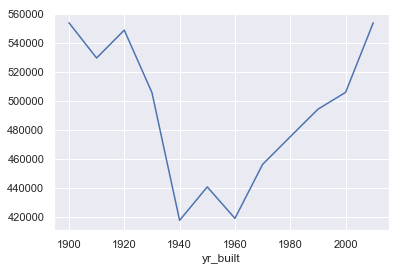

In [184]:
dfbuilt.groupby((df.yr_built//10)*10)['price'].mean().plot()

#### Price and the year built has no correlation. More houses were built in the 2000s than any other decade, around 16%. The average price of homes was lowest between houses built in the 1940s and 1960s. 

In [185]:
dfyr_renovated = dfbuilt[dfbuilt['yr_renovated']!=0]

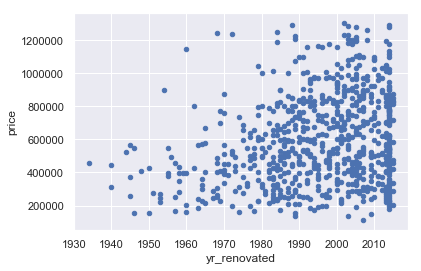

In [186]:
dfyr_renovated.plot(kind='scatter',x='yr_renovated',y='price')

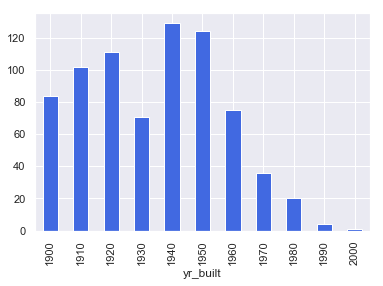

In [187]:
dfyr_renovated.groupby((df.yr_built//10)*10)['yr_renovated'].count().plot(kind='bar',color='royalblue')

#### most homes were renovated between the 1940s and 1950s, around 34%.

In [188]:
dfyr_renovated.groupby((df.yr_renovated//10)*10)['yr_renovated'].count()

yr_renovated
1930      1
1940      9
1950     19
1960     31
1970     52
1980    125
1990    137
2000    212
2010    171
Name: yr_renovated, dtype: int64

In [189]:
dfyr_renovated['yr_renovated'].count()

757

In [190]:
(155+152)/910

0.3373626373626374

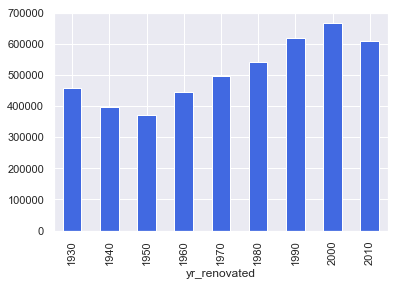

In [191]:
dfyr_renovated.groupby((df.yr_renovated//10)*10)['price'].mean().plot(kind = 'bar',color = 'royalblue')

#### Average prices are higher for homes renovated in the 2000s. 

## Exploratory Data Analysis

In [192]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


Bedrooms, Bathrooms, floors, waterfront are all categorical variables

In [193]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.970100e+04,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000
mean,4.774610e+05,3.313537,2.027664,1930.831024,9515.477285,1.475585,1671.010862,259.820161,1970.144104,76.681285,98079.990305,47.559704,-122.220799,1892.400843,8709.042231
std,2.186310e+05,0.875333,0.685725,714.272280,10205.854712,0.539400,677.660399,387.833879,29.407472,383.621673,53.711423,0.139573,0.137166,578.708847,7330.759334
min,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,3.125000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,1160.000000,0.000000,1951.000000,0.000000,98033.000000,47.468500,-122.333000,1460.000000,5000.000000
50%,4.335000e+05,3.000000,2.000000,1830.000000,7350.000000,1.000000,1500.000000,0.000000,1973.000000,0.000000,98072.000000,47.570000,-122.248000,1780.000000,7420.000000
75%,5.999500e+05,4.000000,2.500000,2390.000000,9886.000000,2.000000,2060.000000,510.000000,1995.000000,0.000000,98118.000000,47.680100,-122.136000,2250.000000,9600.000000
max,1.313000e+06,11.000000,4.250000,4600.000000,130680.000000,3.500000,3950.000000,1540.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3790.000000,55931.000000


### Sqft_living and sqft_living15

My initial thoughts on sqft_living and sqft_living15 is that they are similar. They may be correlated with each other and therefore there will be collinearity, which is not ideal. I will perform a statistical test to determine if there is a difference between the two datasets.

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


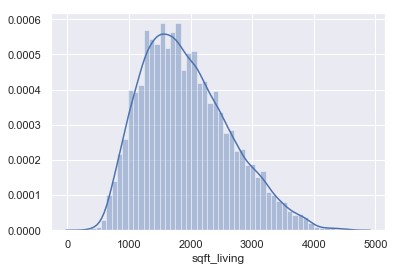

In [194]:
import pylab
from scipy import stats

#checking for normality

sns.distplot(df['sqft_living'])



/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


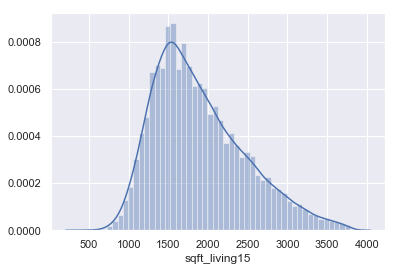

In [195]:
sns.distplot(df['sqft_living15'])

((array([-3.97504665, -3.75869727, -3.64030417, ...,  3.64030417,
          3.75869727,  3.97504665]),
  array([ 290,  370,  380, ..., 4560, 4590, 4600])),
 (705.024552942987, 1930.8310238058984, 0.9868868609865817))

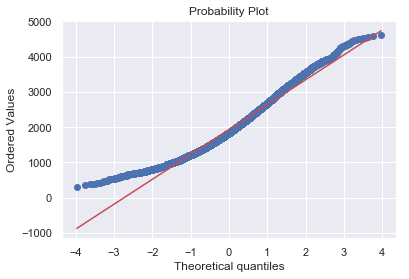

In [196]:
stats.probplot(df['sqft_living'],dist='norm',plot=pylab)


((array([-3.97504665, -3.75869727, -3.64030417, ...,  3.64030417,
          3.75869727,  3.97504665]),
  array([ 460,  460,  620, ..., 3790, 3790, 3790])),
 (566.6376998012711, 1892.4008425968227, 0.9789764956182806))

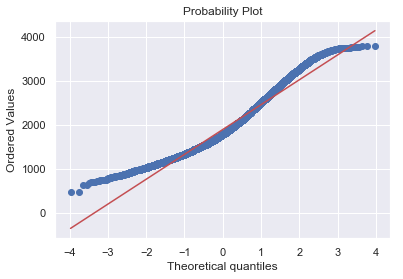

In [197]:
stats.probplot(df['sqft_living15'],dist='norm',plot=pylab)


### Price and Sqft_living

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(34,0.5,'price')

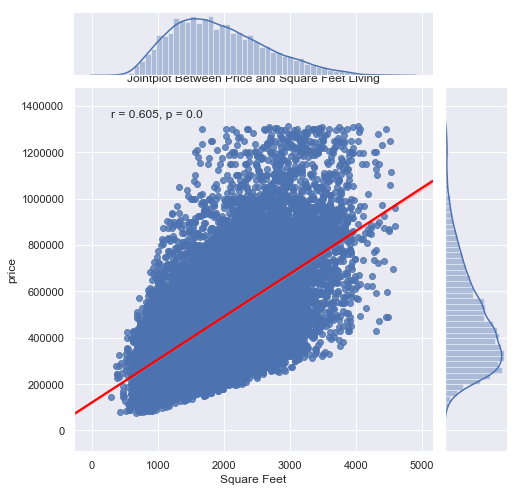

In [198]:
sns.jointplot('sqft_living','price',data = df, kind='reg',size=7,
             joint_kws={'line_kws':{'color':'red'}})
plt.text(300, 1350000, 'r = 0.605, p = 0.0')

plt.title('Jointplot Between Price and Square Feet Living')
plt.xlabel('Square Feet')
plt.ylabel('price')

In [199]:
stats.pearsonr(df['sqft_living'],df['price'])


(0.6050738239763982, 0.0)

In [200]:
print('Pearson r coefficient is: ', 0.702)
print('P-value is: ', 0.0)

Pearson r coefficient is:  0.702
P-value is:  0.0


The correlation coefficient is 0.605. This indicates a positive linear relationship bwtween the two sets of data. The p-value is close to 0, which indicates this relationship is statistically significant. 

### Price and Sqft_lot

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


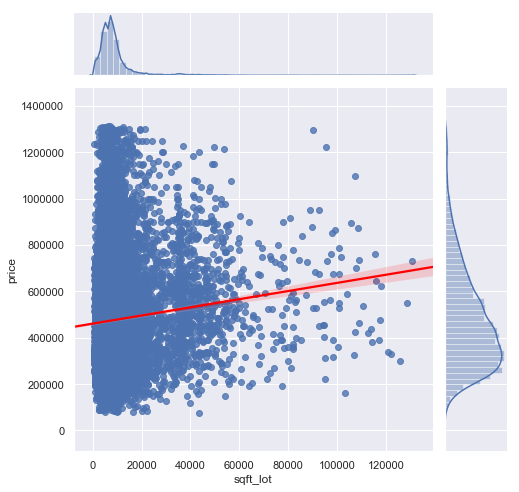

In [201]:
sns.jointplot('sqft_lot','price',data = df, kind='reg',size=7,
             joint_kws={'line_kws':{'color':'red'}})


In [202]:
stats.pearsonr(df['sqft_lot'],df['price'])


(0.0821247179649111, 7.749814706069536e-31)

The correlation coefficient is 0.089, this indicates a weak positive linear relationship bwtween the two sets of data. 

### price and yr_built

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


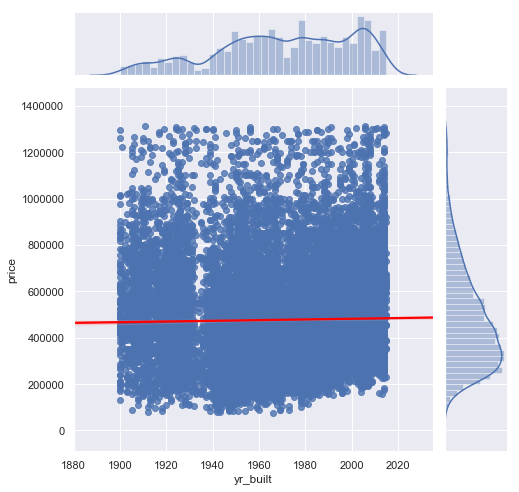

In [203]:
sns.jointplot('yr_built','price',data = df, kind='reg',size=7,
             joint_kws={'line_kws':{'color':'red'}})

In [204]:
stats.pearsonr(df['yr_built'],df['price'])


(0.01996675052076454, 0.005068626638645599)

This relationship is also weakly correlated. 

## price and sqft_above 


/Users/matthewwong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


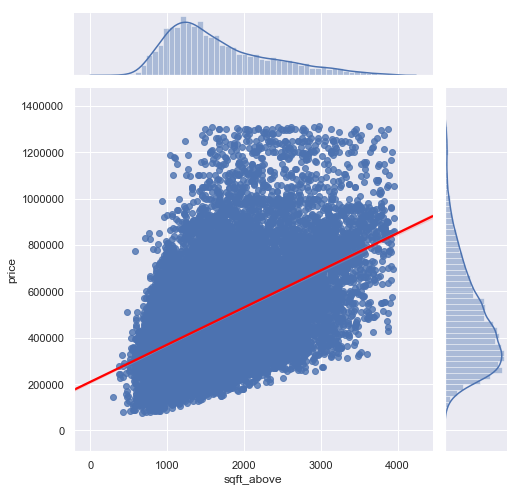

In [205]:
sns.jointplot('sqft_above','price',data = df, kind='reg',size=7,
             joint_kws={'line_kws':{'color':'red'}})

In [206]:
stats.pearsonr(df['sqft_above'],df['price'])


(0.49733605337902365, 0.0)

The correlation coefficient is 0.606 which is close to 1. This indicates a fairly positive linear relationship bewtween the two sets of data. The p-value is close to 0, which indicates this relationship is statistically significant. 

## Checking Out Correlation Among All Variables

Having too many features in a model is not always good because it might cause overfitting. Its important to note, keeping two highly correlated variables might not be a good idea, as we are test the relationship between price and another variable, however our results might indicate that the variable may be influence by another variable other than price. 

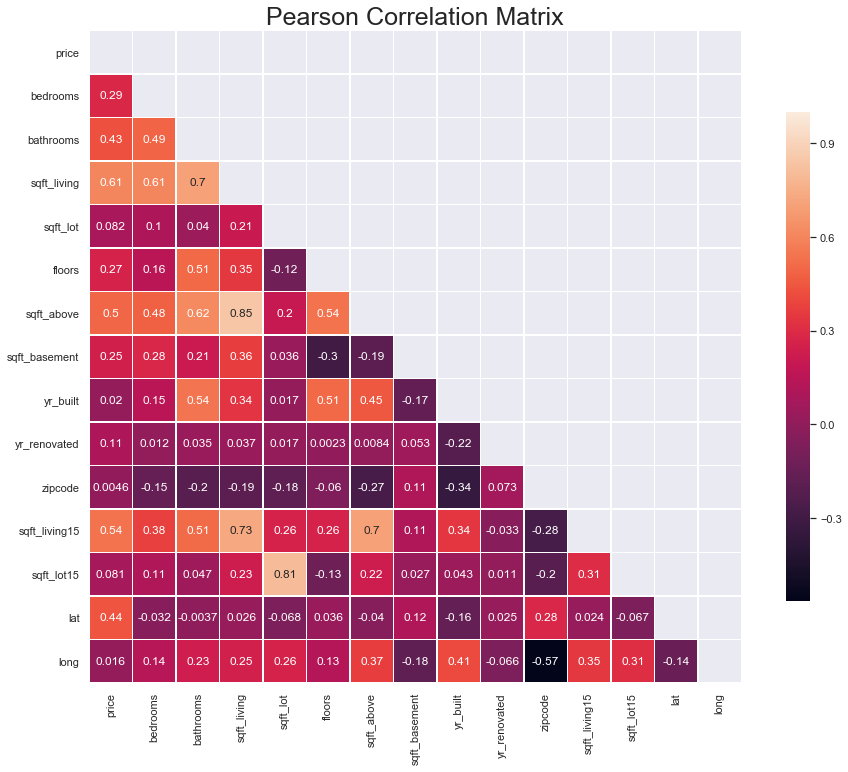

In [207]:
features = ['price', 'bedrooms','bathrooms','sqft_living','sqft_lot',
           'floors','waterfront','view','condition','grade','sqft_above',
            'sqft_basement','yr_built','yr_renovated','zipcode','sqft_living15'
           ,'sqft_lot15','lat','long']

mask = np.zeros_like(df[features].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(16,12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=1.0, square=True,
            linecolor='w',annot=True,mask=mask,cbar_kws={'shrink':.75});
            
            
            

In [208]:
df.info() #some features are not needed for model, and some we need to convert to numeric


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19701 entries, 0 to 21612
Data columns (total 21 columns):
date             19701 non-null datetime64[ns]
price            19701 non-null float64
bedrooms         19701 non-null int64
bathrooms        19701 non-null float64
sqft_living      19701 non-null int64
sqft_lot         19701 non-null int64
floors           19701 non-null float64
waterfront       19701 non-null category
view             19701 non-null category
condition        19701 non-null category
grade            19701 non-null category
sqft_above       19701 non-null int64
sqft_basement    19701 non-null int64
yr_built         19701 non-null int64
yr_renovated     19701 non-null int64
zipcode          19701 non-null int64
lat              19701 non-null float64
long             19701 non-null float64
sqft_living15    19701 non-null int64
sqft_lot15       19701 non-null int64
renovated        19701 non-null category
dtypes: category(5), datetime64[ns](1), float64(5), int64(1

In [209]:
new_df = df.drop(['date'],axis=1)

In [210]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,No
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Yes
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,No
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,No
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,No


# Building a Model

In this section, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to reinforce greatly the confidence in the predictions.

#### defining our preformance metric

We will calculate the coefficient of determination, $R^2$, to quantiy the model's performance. $R^2$ for a model is useful statistic in regression analysis, as it describes how 'good' that model is at making predictions.

The values of $R^2$ ranges from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable.

In [211]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    '''Calculates and returns the performance score between true 
    and predicted values based on the metric chosen'''
    
    score = r2_score(y_true,y_predict)
    return score




### Linear Regression with housing data

Our Y is our target variable, the data that we are trying to predict. For this project our Y is the price of the house. Our X will be all other features that will be used to influence Y. 
- Y = housing prices (dependent variable
, response variables)
- X = all other features (independent variables, predictors, explanatory variables)

In [212]:
#import sklearn packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

seed = 42

#### preprocessing our data

In [213]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19701 entries, 0 to 21612
Data columns (total 20 columns):
price            19701 non-null float64
bedrooms         19701 non-null int64
bathrooms        19701 non-null float64
sqft_living      19701 non-null int64
sqft_lot         19701 non-null int64
floors           19701 non-null float64
waterfront       19701 non-null category
view             19701 non-null category
condition        19701 non-null category
grade            19701 non-null category
sqft_above       19701 non-null int64
sqft_basement    19701 non-null int64
yr_built         19701 non-null int64
yr_renovated     19701 non-null int64
zipcode          19701 non-null int64
lat              19701 non-null float64
long             19701 non-null float64
sqft_living15    19701 non-null int64
sqft_lot15       19701 non-null int64
renovated        19701 non-null category
dtypes: category(5), float64(5), int64(10)
memory usage: 3.1 MB


In [214]:
le = LabelEncoder()

new_df['waterfront'] = le.fit_transform(new_df['waterfront'])
new_df['view'] = le.fit_transform(new_df['view'])
new_df['condition'] = le.fit_transform(new_df['condition'])
new_df['grade'] = le.fit_transform(new_df['grade'])
new_df['renovated'] = le.fit_transform(new_df['renovated'])


#### Configure our base-line model

#### Training set & test set

A Machine learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable. In order to do this we need to divide our data set into two sets. One set for training and another for testing. The training set is the set which we will train our algorithm to build a model, the test set is the model we use to see how accuracter our predictions are. 

Typically, the data is shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [215]:
X = new_df.drop('price',axis=1)
y = new_df['price'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)


We want to know if the model has learned properly from a training split. 
- the model didn't learn well on the data, and can't predict even the outcomes of the training set, underfitting caused by huge bias.
- the model learn too well from the data, which prevents to from being able to generalize new data, overfitting caused by high variance
- the model has the right balance between variance and bias, it learned well and is able to predict correctly.


### Linear Regression 

In [353]:
Scaled_Reg = Pipeline(
    [('Scaler', StandardScaler()),
    ('Reg', LinearRegression())])

In [354]:
Scaled_Reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [355]:
results, names = [], []
cv_results_reg = cross_val_score(Scaled_Reg, X_train, y_train, cv=5,
                                 scoring='r2', n_jobs=-1)
names.append('Scaled Linear Regression')
results.append(cv_results_reg)
rm = '%s: %f (+/- %f)' % ('Scaled Linear Regression', cv_results_reg.mean(), cv_results_reg.std())
print(rm)
    
    

Scaled Linear Regression: 0.688076 (+/- 0.012256)


In [356]:
pred_reg = Scaled_Reg.predict(X_test)

In [357]:
print('Linear Regression accuracy training set:', Scaled_Reg.score(X_train,y_train))
print('Linear Regression R-squared: ',r2_score(y_test,pred_reg) )
print('Linear Regression MSE: ', mean_squared_error(y_test,pred_reg))
print('Linear Regression MAE:',mean_absolute_error(y_test,pred_reg))
print('Linear Regression RMSE:',np.sqrt(mean_squared_error(y_test,pred_reg)))

Linear Regression accuracy training set: 0.6895286834041381
Linear Regression R-squared:  0.6890651674338089
Linear Regression MSE:  14460440016.88778
Linear Regression MAE: 88839.31414283585
Linear Regression RMSE: 120251.56970654387


In [358]:
algo = []
train_score = []
R_Squared = []
RMSE = []
MAE = []

algo.append('Linear Regression')
train_score.append(Scaled_Reg.score(X_train,y_train))
R_Squared.append(r2_score(y_test,pred_reg))
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_reg)))
MAE.append(mean_absolute_error(y_test,pred_reg))


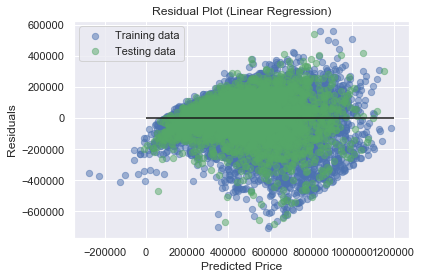

In [384]:
plt.scatter(Scaled_Reg.predict(X_train),Scaled_Reg.predict(X_train)-y_train,c='b',s=40,alpha=0.5,label='Training data')
plt.scatter(Scaled_Reg.predict(X_test),Scaled_Reg.predict(X_test)-y_test,c='g',s=40,alpha=0.5,label ='Testing data')
plt.hlines(y=0,xmin=0, xmax=1200000)
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.legend()

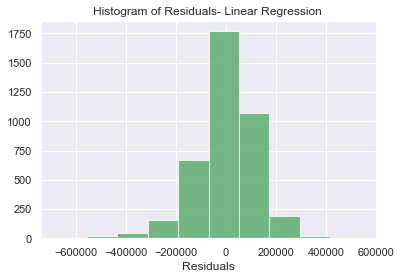

In [387]:
plt.hist(Scaled_Reg.predict(X_test)-y_test,alpha = 0.8 ,color='g')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals- Linear Regression ')
plt.show()


In [388]:
pred_val_reg_test = Scaled_Reg.predict(X_test)
true_val_reg_test = y_test
res_reg_test = true_val_reg_test - pred_val_reg_test 

**Linearity**

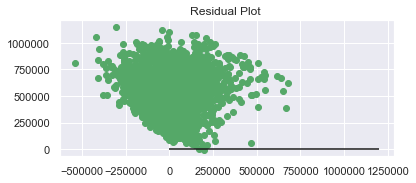

In [395]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(res_reg_test, pred_val_reg_test, color = 'g')
_ = plt.hlines(y=0,xmin=, xmax=1200000)
_ = plt.title('Residual Plot ')

It seems like the corresponding residual plot is reasonably random.

**Normality**

0.9640294297514831

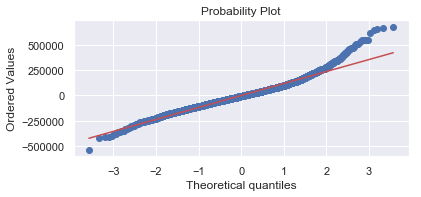

In [391]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__,___,r) = sp.stats.probplot(res_reg_test,plot=ax,fit=True)
r**2

The good fit indicate that normality is a reasonable approximation. 

### Elastic Net

In [320]:
Scaled_elastic = Pipeline(
    [('Scaler', StandardScaler()),
    ('ElasticNet', ElasticNet(random_state = seed))])

In [321]:
Scaled_elastic.fit(X_train,y_train)


Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ElasticNet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])

In [322]:

cv_results_en = cross_val_score(Scaled_elastic, X_train, y_train, cv=5,
                                 scoring='r2', n_jobs=-1)
names.append('Scaled Elastic Net')
results.append(cv_results_en)
rm1 = '%s: %f (+/- %f)' % ('Scaled Elastic Net', cv_results_en.mean(), cv_results_en.std())
print(rm1)
    
    

Scaled Elastic Net: 0.645579 (+/- 0.014117)


In [323]:
pred_el = Scaled_elastic.predict(X_test)

In [324]:
print('Linear Regression (Elastic Net) accuracy training set:', Scaled_elastic.score(X_train,y_train))
print('Linear Regression (Elastic Net) R-squared: ',performance_metric(y_test,pred_el) )
print('Linear Regression (Elastic Net) MSE: ', mean_squared_error(y_test,pred_el))
print('Linear Regression (Elastic Net) MAE:',mean_absolute_error(y_test,pred_el))
print('Linear Regression (Elastic Net) RMSE:',np.sqrt(mean_squared_error(y_test,pred_el)))

Linear Regression (Elastic Net) accuracy training set: 0.6464408502822183
Linear Regression (Elastic Net) R-squared:  0.6517962207744822
Linear Regression (Elastic Net) MSE:  16193682198.897278
Linear Regression (Elastic Net) MAE: 94454.91067565189
Linear Regression (Elastic Net) RMSE: 127254.39952668543


In [344]:
algo.append('Elastic Net')
train_score.append(Scaled_elastic.score(X_train,y_train))
R_Squared.append(r2_score(y_test,pred_el))
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_el)))
MAE.append(mean_absolute_error(y_test,pred_el))

In our model, ~65% of the variability in Y can be explained using X. Which is not very good. Calculating RMSE and MAE we get 127254 and 94454 respectively. Indicating our model was able to predict the value of every house in the test set within $127,254 of the mean price.

The model also indicate that its performance on testing data is similar to its performance on training data, therefore it does not show any indication of overfitting or underfitting. 

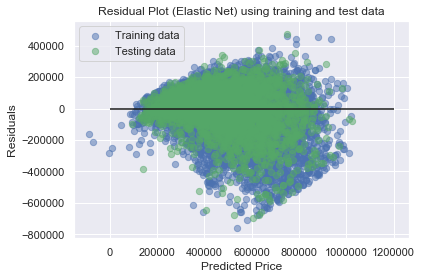

In [325]:
plt.scatter(Scaled_elastic.predict(X_train),Scaled_elastic.predict(X_train)-y_train,c='b',s=40,alpha=0.5,label='Training data')
plt.scatter(Scaled_elastic.predict(X_test),Scaled_elastic.predict(X_test)-y_test,c='g',s=40,alpha=0.5,label ='Testing data')
plt.hlines(y=0,xmin=0, xmax=1200000)
plt.title('Residual Plot (Elastic Net) using training and test data')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.legend()

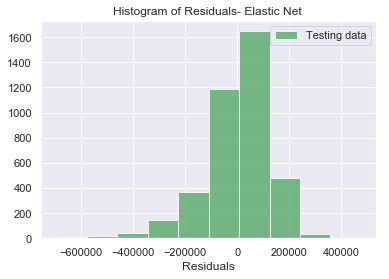

In [326]:
plt.hist(Scaled_elastic.predict(X_test)-y_test,alpha = 0.8 ,color='g',label='Testing data')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals- Elastic Net ')
plt.legend()
plt.show()


### Random Forest

In [359]:
from sklearn.ensemble import RandomForestRegressor


forest_reg = Pipeline(
    [('Scaler', StandardScaler()),
    ('Random Forest', RandomForestRegressor(random_state = seed))])
forest_reg.fit(X_train,y_train)


Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Random Forest', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [328]:
cv_results_rf = cross_val_score(forest_reg, X_train, y_train, cv=5,
                                 scoring='r2', n_jobs=-1)
names.append('Scaled Random Forest')
results.append(cv_results_rf)
rm_rf = '%s: %f (+/- %f)' % ('Scaled Random Forest', cv_results_rf.mean(), cv_results_rf.std())
print(rm_rf)

Scaled Random Forest: 0.842136 (+/- 0.010863)


In [329]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred,y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest accuracy training set:', forest_reg.score(X_train,y_train))
print('Random Forest R-squared Score:', r2_score(y_test,y_pred) )
print('Random Forest RMSE: ', forest_rmse)
print('Random Forest MSE: ', mean_squared_error(y_test,y_pred))
print('Random Forest MAE:',mean_absolute_error(y_test,y_pred))




Random Forest accuracy training set: 0.9702195231028936
Random Forest R-squared Score: 0.8515776635599301
Random Forest RMSE:  83081.76185628724
Random Forest MSE:  6902579153.144825
Random Forest MAE: 56879.24590960718


In [345]:
algo.append('Random Forest')
train_score.append(forest_reg.score(X_train,y_train))
R_Squared.append(r2_score(y_test,y_pred))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
MAE.append(mean_absolute_error(y_test,y_pred))

#### Randomized Search in Random Forest

We will use randomized search to find the best parameters for the Random Forest model

In [403]:
#best params
from sklearn.model_selection import RandomizedSearchCV

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop =200, num=10)]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
#minimum number of samples required to split a node 
min_samples_split = [2,5,10]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
#method of selecting samples for training each tree
bootstrap = [True, False]
#create a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
}

In [361]:
#use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
#random search of parameters, using 3 fold cross validation,
rf_random = RandomizedSearchCV(estimator =rf,
                               param_distributions= random_grid, n_iter=100,
                              cv = 3, verbose =2, random_state =42, n_jobs=-1)

#fit the search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_

KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

In [360]:
#predicting with best params

Scaled_rfbp = Pipeline(
    [('Scaler', StandardScaler()),
    ('RF_BP', RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=2,
                                    max_features = 'auto',max_depth=90,bootstrap=True,random_state = seed))])
rf_random = Scaled_rfbp.fit(X_train,y_train)

y_search = rf_random.predict(X_test)
search_mse = mean_squared_error(y_search,y_test)
search_rmse = np.sqrt(search_mse)

print('Random Forest (Best Params) accuracy training set:', rf_random.score(X_train,y_train))
print('Random Forest (Best Params) R2-score:', r2_score(y_test,y_search))
print('Random Forest (Best Params) RMSE: ', search_rmse)
print('Random Forest (Best Params) MSE: ', mean_squared_error(y_test,y_search))
print('Random Forest (Best Params) MAE:',mean_absolute_error(y_test,y_search))


Random Forest (Best params) accuracy training set: 0.9700113259720278
Random Forest (Best Params) R2-score: 0.8689996599638001
Random Forest (Best Params) RMSE:  78053.48116707573
Random Forest (Best Params) MSE:  6092345922.299046
Random Forest (Best Params) MAE: 52810.84449935537


In [361]:
algo.append('Random Forest (Best Params)')
train_score.append(rf_random.score(X_train,y_train))
R_Squared.append(r2_score(y_test,y_search))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_search)))
MAE.append(mean_absolute_error(y_test,y_search))

In [362]:
cv_results_rfbp = cross_val_score(Scaled_rfbp, X_train, y_train, cv=5,
                                 scoring='r2', n_jobs=-1)
names.append('Scaled Random Forest (Best Params)')
results.append(cv_results_rfbp)
rm_bp = '%s: %f (+/- %f)' % ('Scaled Random Forest (Best Params)', cv_results_rfbp.mean(), cv_results_rfbp.std())
print(rm_bp)
    

Scaled Random Forest (Best Params): 0.858035 (+/- 0.009464)


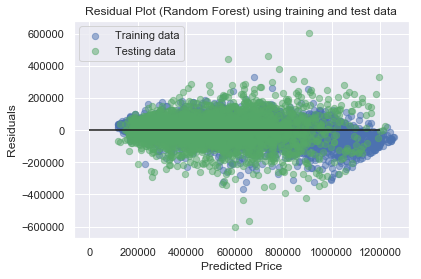

In [363]:
plt.scatter(Scaled_rfbp.predict(X_train),Scaled_rfbp.predict(X_train)-y_train,c='b',s=40,alpha=0.5,label='Training data')
plt.scatter(Scaled_rfbp.predict(X_test),Scaled_rfbp.predict(X_test)-y_test,c='g',s=40,alpha=0.5,label='Testing data')
plt.hlines(y=0,xmin=0, xmax=1200000)
plt.title('Residual Plot (Random Forest) using training and test data')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.legend()

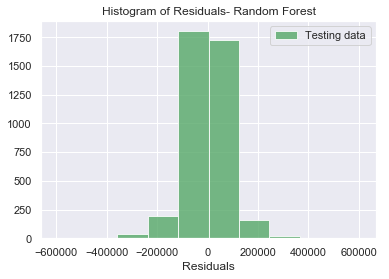

In [364]:
plt.hist(Scaled_rfbp.predict(X_test)-y_test,alpha = 0.8 ,color='g',label='Testing data')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals- Random Forest')
plt.legend()
plt.show()

In [398]:
pred_val_rf_test = Scaled_rfbp.predict(X_test)
true_val_rf_test = y_test
res_rf_test = true_val_rf_test - pred_val_rf_test 

0.9286185239853704

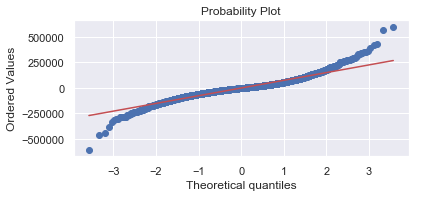

In [399]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__,___,r) = sp.stats.probplot(res_rf_test,plot=ax,fit=True)
r**2

### Gradient Boosting

In [365]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

Scaled_Gradient = Pipeline(
    [('Scaler', StandardScaler()),
    ('Gradient Boosting', GradientBoostingRegressor())])
Scaled_Gradient.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Gradient Boosting', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decre...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))])

In [366]:
y_pred = Scaled_Gradient.predict(X_test)
gb_model_mse = mean_squared_error(y_pred,y_test)
gb_model_rmse = np.sqrt(gb_model_mse)

print('Gradient Boosting R-Squared Training set: ', Scaled_Gradient.score(X_train,y_train))
print('Gradient Boosting R-squared: ',performance_metric(y_test,y_pred) )
print('Gradient Boosting MSE: ', mean_squared_error(y_test,y_pred))
print('Gradient Boosting MAE:',mean_absolute_error(y_test,y_pred))
print('Gradient Boosting RMSE:',gb_model_rmse)





Gradient Boosting R-Squared Training set:  0.8567233144007985
Gradient Boosting R-squared:  0.8494017461193355
Gradient Boosting MSE:  7003773102.281163
Gradient Boosting MAE: 58694.255075558074
Gradient Boosting RMSE: 83688.54821468206


#### parameter tuning -Gradient Boosting

In [420]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [422]:
clf.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [424]:
clf.score(X_test,y_test)


0.8789479685268531

In [367]:
algo.append('Gradient boosting')
train_score.append(Scaled_Gradient.score(X_train,y_train))
R_Squared.append(r2_score(y_test,y_pred))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
MAE.append(mean_absolute_error(y_test,y_pred))

In [368]:
cv_results_gb = cross_val_score(Scaled_Gradient, X_train, y_train, cv=5,
                                 scoring='r2', n_jobs=-1)
names.append('Scaled Gradient Boost')
results.append(cv_results_gb)
rm_gb = '%s: %f (+/- %f)' % ('Scaled Gradient Boost', cv_results_gb.mean(), cv_results_gb.std())
print(rm_gb)

Scaled Gradient Boost: 0.840845 (+/- 0.008657)


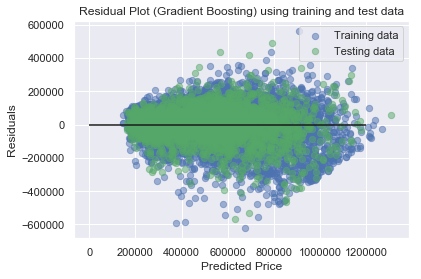

In [369]:
plt.scatter(Scaled_Gradient.predict(X_train),Scaled_Gradient.predict(X_train)-y_train,c='b',s=40,alpha=0.5,label='Training data')
plt.scatter(Scaled_Gradient.predict(X_test),Scaled_Gradient.predict(X_test)-y_test,c='g',s=40,alpha=0.5,label='Testing data')
plt.hlines(y=0,xmin=0, xmax=1200000)
plt.title('Residual Plot (Gradient Boosting) using training and test data')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.legend()

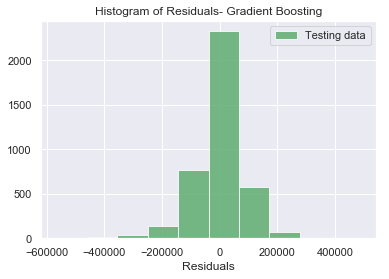

In [370]:
plt.hist(Scaled_Gradient.predict(X_test)-y_test,alpha = 0.8 ,color='g',label='Testing data')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals- Gradient Boosting')
plt.legend()
plt.show()

In [435]:
pred_val_gb_test = Scaled_Gradient.predict(X_test)
true_val_gb_test = y_test
res_gb_test = true_val_gb_test - pred_val_gb_test 

0.9421505146419679

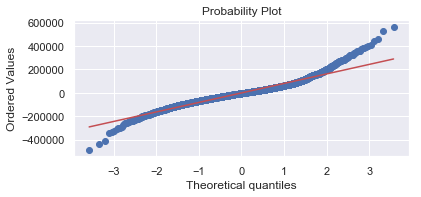

In [436]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__,___,r) = sp.stats.probplot(res_gb_test,plot=ax,fit=True)
r**2

### Comparing different models

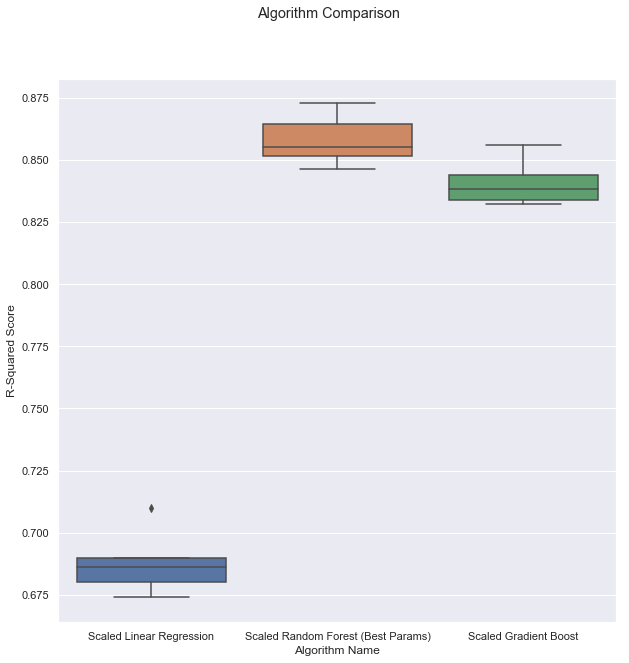

In [372]:
#boxplots of algorithms for comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
sns.boxplot(x=names, y= results)
ax.set_xlabel('Algorithm Name')
ax.set_ylabel('R-Squared Score')
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

In [ ]:
algo.append('Linear Regression')
train_score.append(Scaled_Reg.score(X_train,y_train))
R_Squared.append(r2_score(y_test,pred_reg))
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_reg)))
MAE.append(mean_absolute_error(y_test,pred_reg))

In [373]:
algo

['Linear Regression', 'Random Forest (Best Params)', 'Gradient boosting']

In [374]:
perf = {'Model':algo,
       'R-Squared':R_Squared,
       'RMSE': RMSE,
       'MAE': MAE }


In [382]:
df_metrics = pd.DataFrame.from_dict(perf)

In [379]:
df_metrics

,Model,R-Squared,RMSE,MAE
0,Linear Regression,0.689065,120251.569707,88839.314143
1,Random Forest (Best Params),0.869000,78053.481167,52810.844499
2,Gradient boosting,0.849402,83688.548215,58694.255076


In [380]:
df_metrics.set_index('Model',inplace=True)

In [381]:
df_metrics

,R-Squared,RMSE,MAE
Model,,,
Linear Regression,0.689065,120251.569707,88839.314143
Random Forest (Best Params),0.869000,78053.481167,52810.844499
Gradient boosting,0.849402,83688.548215,58694.255076
